In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-worlds-500-most-powerful-businessmen/top rich2024.csv


# About Dataset
> Bloomberg Billionaires Index
View profiles for each of the world’s 500 richest people, see the biggest movers, and compare fortunes or track returns.
As of December 12, 2024
The Bloomberg Billionaires Index is a daily ranking of the world’s richest people. Details about the calculations are provided in the net worth analysis on each billionaire’s profile page. The figures are updated at the close of every trading day in New York.

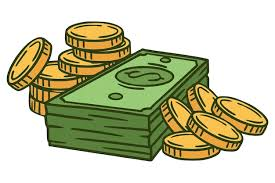

# Import The Library

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings ("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/the-worlds-500-most-powerful-businessmen/top rich2024.csv")

In [4]:
df.head()

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
0,1,Elon Musk,$447B,+$62.8B,+$218B,United States,Technology
1,2,Jeff Bezos,$249B,+$4.65B,+$72.1B,United States,Technology
2,3,Mark Zuckerberg,$224B,+$4.58B,+$95.5B,United States,Technology
3,4,Larry Ellison,$198B,+$1.63B,+$75.3B,United States,Technology
4,5,Bernard Arnault,$181B,+$1.32B,-$26.4B,France,Consumer


In [5]:
df.shape

(500, 7)

# Check for missing values

In [6]:
df.isnull().sum()

Rank                0
 Name               0
Total net worth     0
$ Last change       0
$ YTD change        0
Country / Region    0
Industry            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              500 non-null    int64 
 1    Name             500 non-null    object
 2   Total net worth   500 non-null    object
 3   $ Last change     500 non-null    object
 4   $ YTD change      500 non-null    object
 5   Country / Region  500 non-null    object
 6   Industry          500 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.5+ KB


# EDA

# PreProcessing!

In [8]:
def clean(value):

    value = str(value).replace('$', '').replace(',', '').strip()  # Remove dollar signs and commas
    multiplier = 1 
    if 'B' in value:
        multiplier = 1e9
    elif 'M' in value:
        multiplier = 1e6
    
    try:
        # Convert numeric part to float and apply multiplier
        return float(value.replace('B', '').replace('M', '').strip()) * multiplier
    except ValueError:
        return 0 


df['Total net worth '] = df['Total net worth '].apply(clean)
df['$ Last change '] = df['$ Last change '].apply(clean)
df['$ YTD change'] = df['$ YTD change'].apply(clean)

In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,500.0,NaN,NaN,NaN,250.5,144.481833,1.0,125.75,250.5,375.25,500.0
Name,500,500,Elon Musk,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total net worth,500.0,NaN,NaN,NaN,20108140000.0,33819339606.254974,6380000000.0,7927500000.0,11000000000.0,17525000000.0,447000000000.0
$ Last change,500.0,NaN,NaN,NaN,194893980.0,2902651514.600743,-7410000000.0,-59300000.0,0.0,64725000.0,62800000000.0
$ YTD change,500.0,NaN,NaN,NaN,3550333800.0,13506312283.806152,-26400000000.0,323500000.0,1395000000.0,3150000000.0,218000000000.0
Country / Region,500,48,United States,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,500,14,Technology,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN


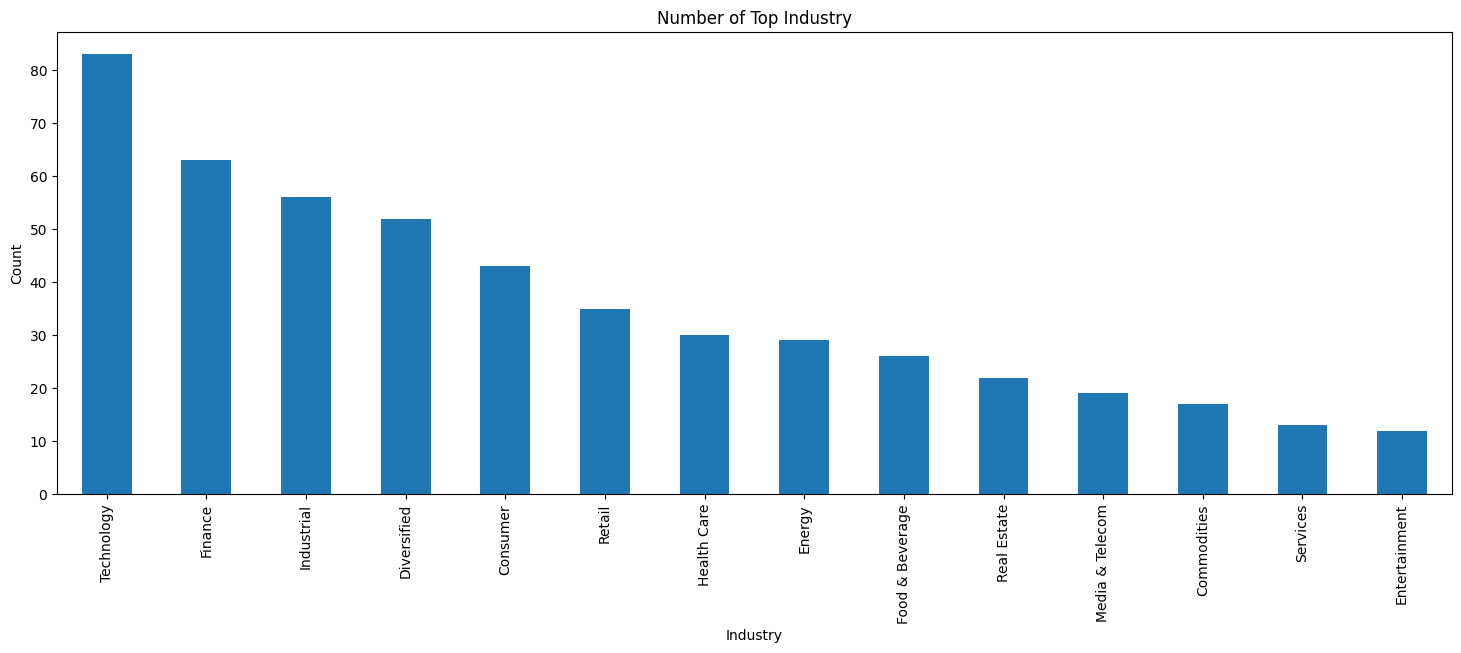

In [10]:
industry_count = df["Industry"].value_counts()

plt.figure(figsize=(18, 6))
industry_count.plot(kind = "bar")
plt.title("Number of Top Industry")
plt.xlabel("Industry")
plt.ylabel('Count')
plt.show()


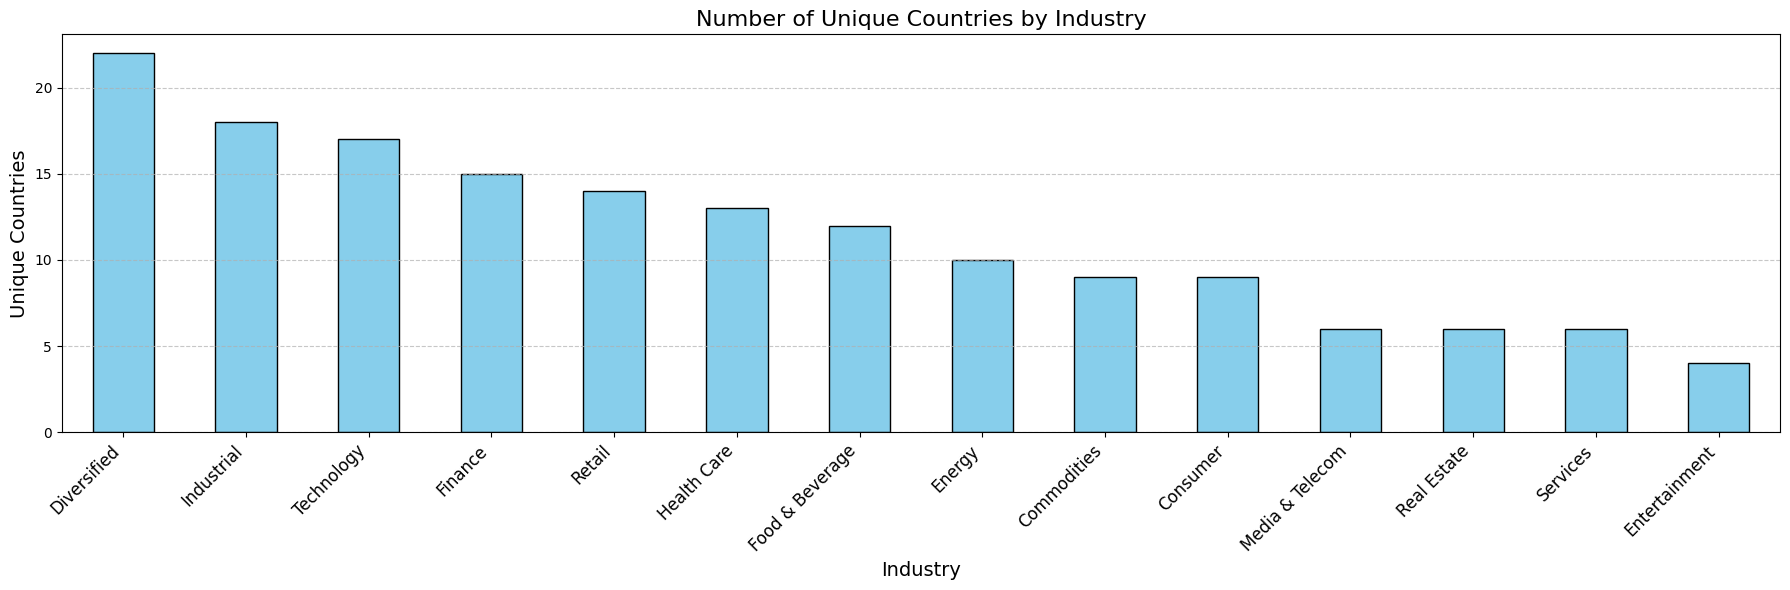

In [11]:
# Assuming `industry_by_country` is already created
industry_by_country_count = (
    df.groupby('Industry')['Country / Region']
    .apply(lambda x: len(set(x)))
    .sort_values(ascending=False)
)

# Plotting
plt.figure(figsize=(18, 6))
industry_by_country_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Unique Countries by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Unique Countries', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()



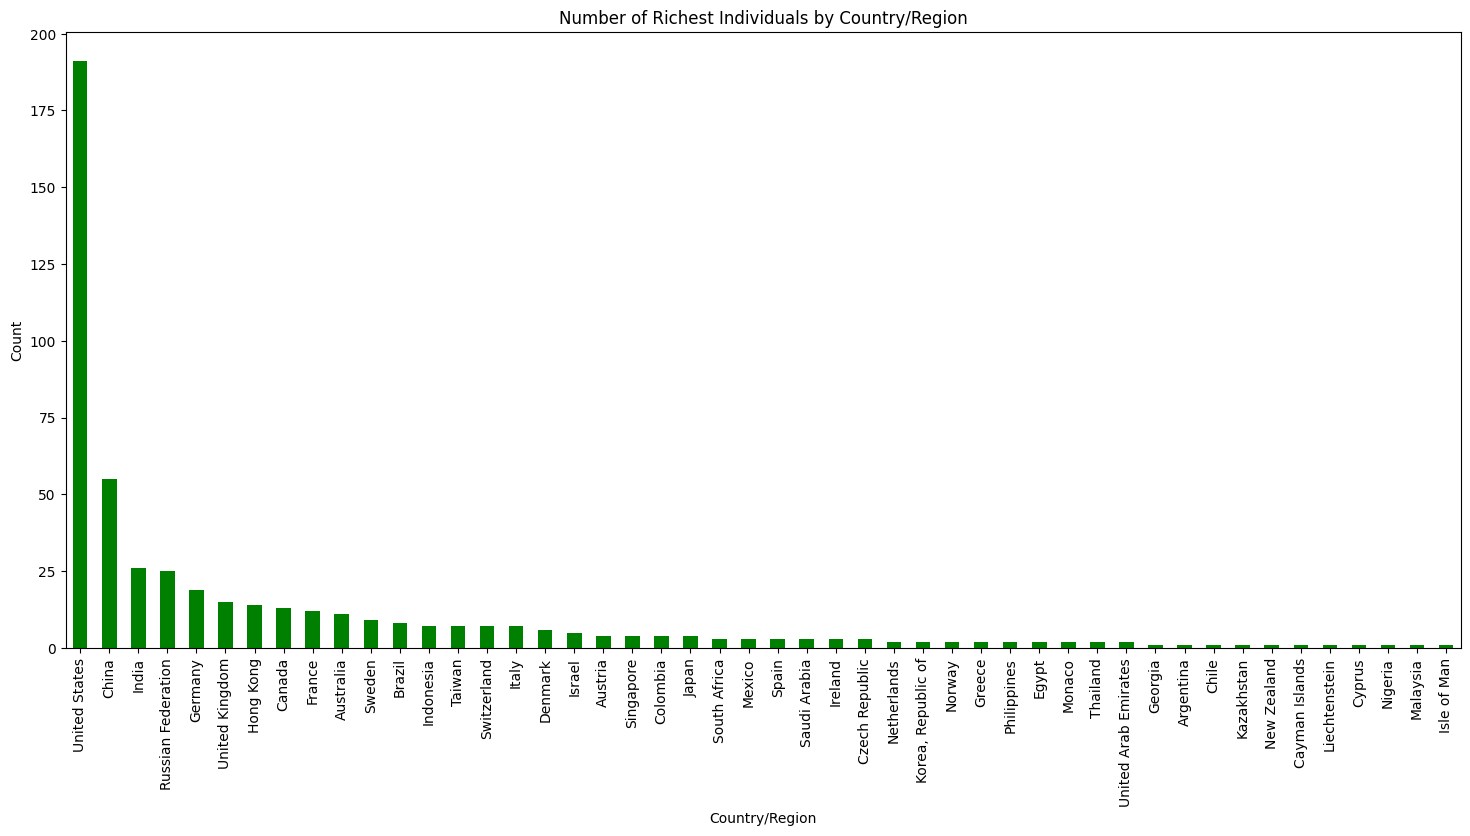

In [12]:
# Count by Country/Region
region_counts = df['Country / Region'].value_counts()

# Bar chart
plt.figure(figsize=(18, 8))
region_counts.plot(kind='bar', color='green')
plt.title('Number of Richest Individuals by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.show()

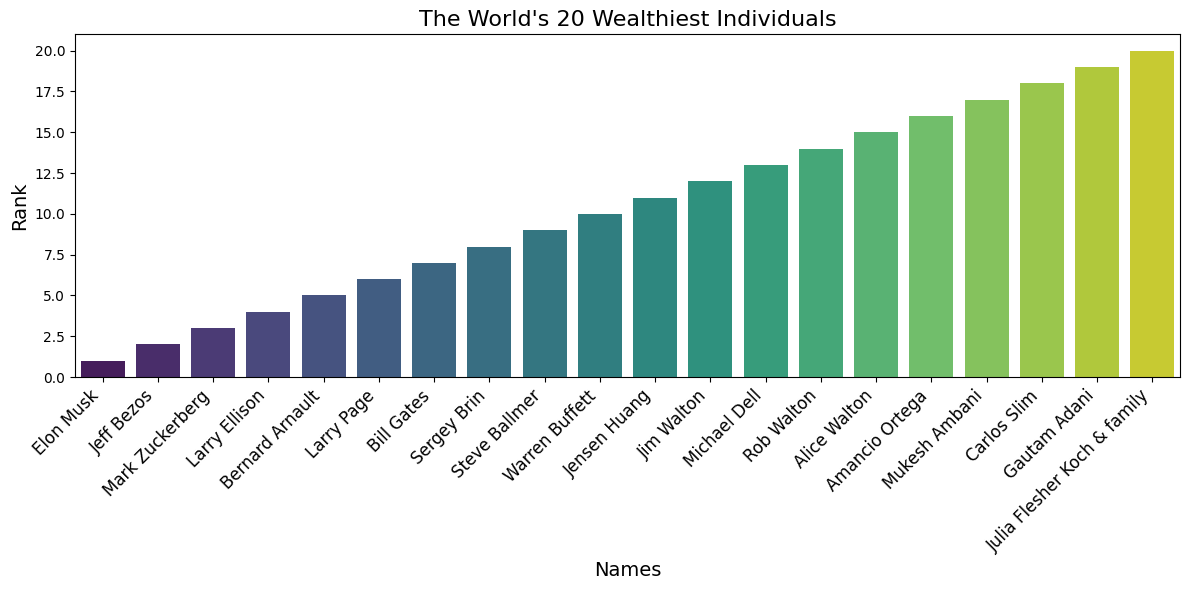

In [13]:


name_rank = df.groupby(" Name")["Rank"].sum().sort_values(ascending=True).head(20).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=name_rank, x=" Name", y="Rank", palette="viridis")
plt.title("The World's 20 Wealthiest Individuals", fontsize=16)
plt.xlabel("Names", fontsize=14)
plt.ylabel("Rank", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


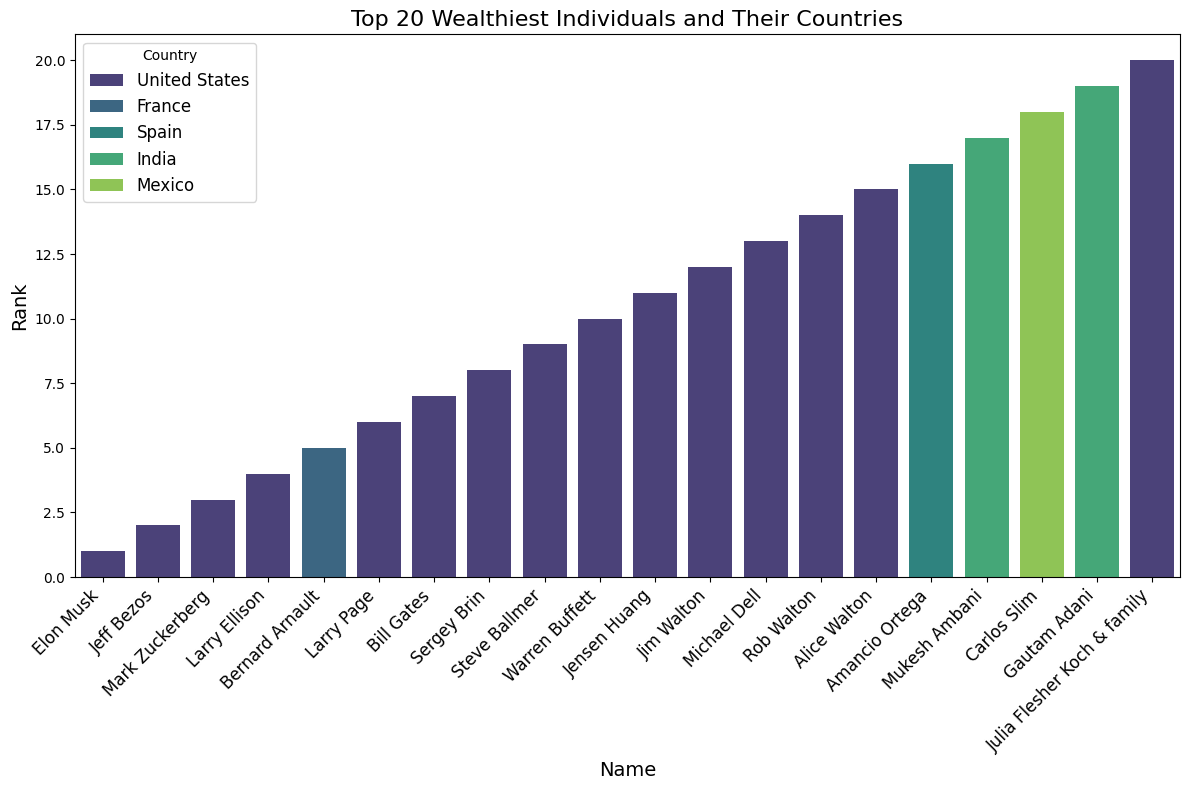

In [14]:
# Ensure proper data preparation
Name_Country = (
    df.groupby(["Rank", " Name"])['Country / Region']
    .sum()
    .reset_index()
    .sort_values(by="Rank", ascending=True)
    .head(20)
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=Name_Country,
    x=" Name",  # Names on the x-axis
    y="Rank",   # Ranks on the y-axis
    hue="Country / Region",  # Differentiate by country
    dodge=False,  # Avoid grouping for rank
    palette="viridis"
)

plt.title("Top 20 Wealthiest Individuals and Their Countries", fontsize=16)
plt.xlabel("Name", fontsize=14)
plt.ylabel("Rank", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title="Country", fontsize=12)
plt.tight_layout()
plt.show()



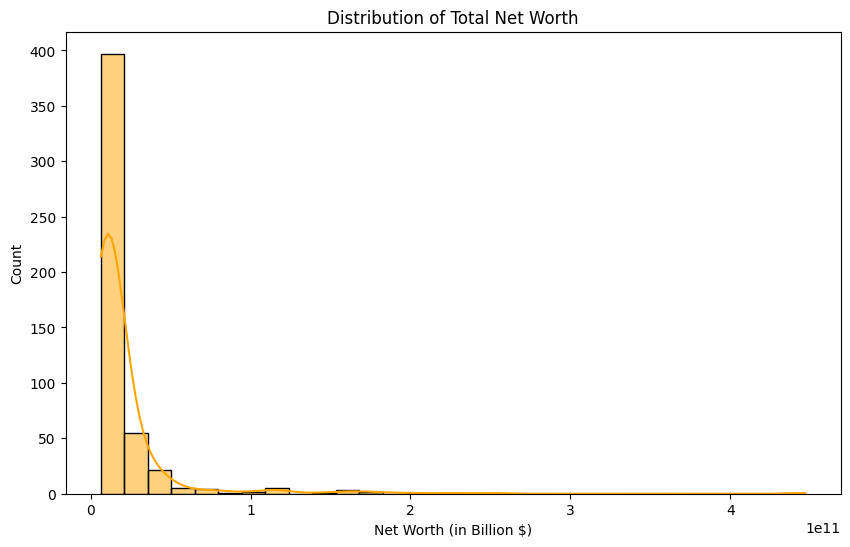

In [15]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Total net worth '], kde=True, bins=30, color='orange')
plt.title('Distribution of Total Net Worth')
plt.xlabel('Net Worth (in Billion $)')
plt.ylabel('Count')
plt.show()

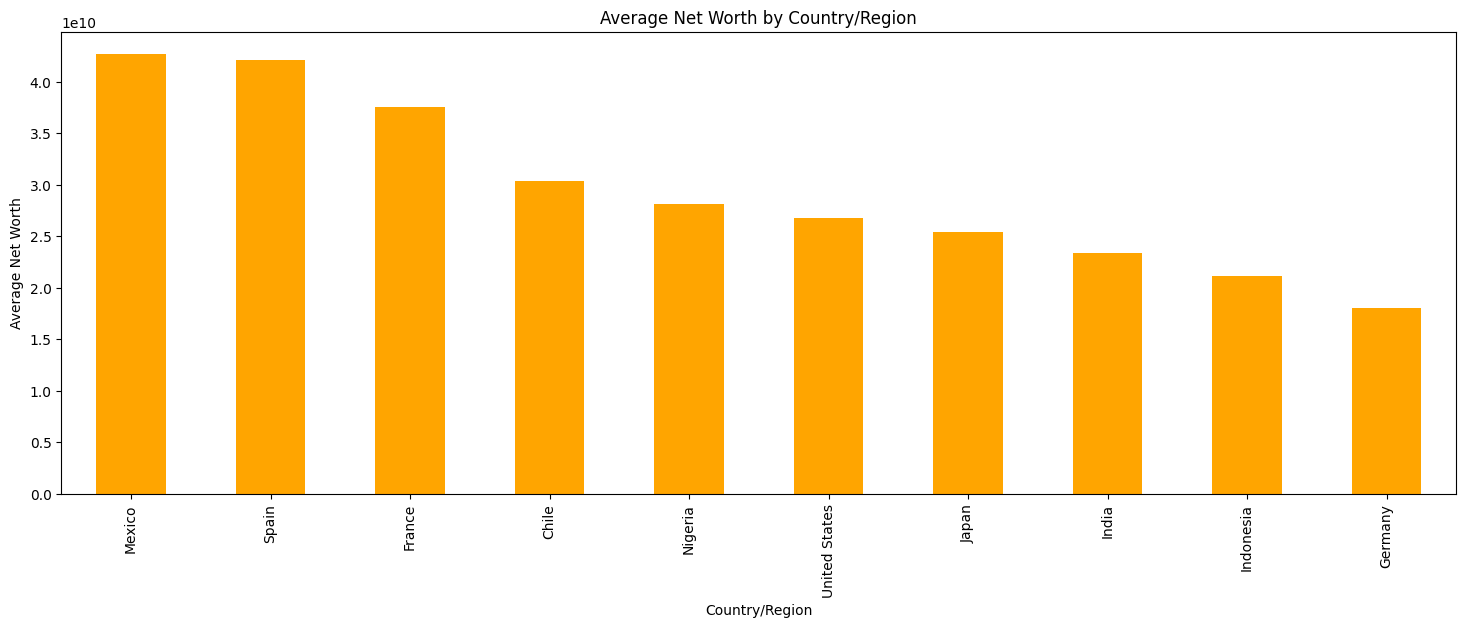

In [16]:
region_wealth = df.groupby('Country / Region')['Total net worth '].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(18, 6))
region_wealth.head(10).plot(kind='bar', color='orange')  
plt.title('Average Net Worth by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Average Net Worth')
plt.show()

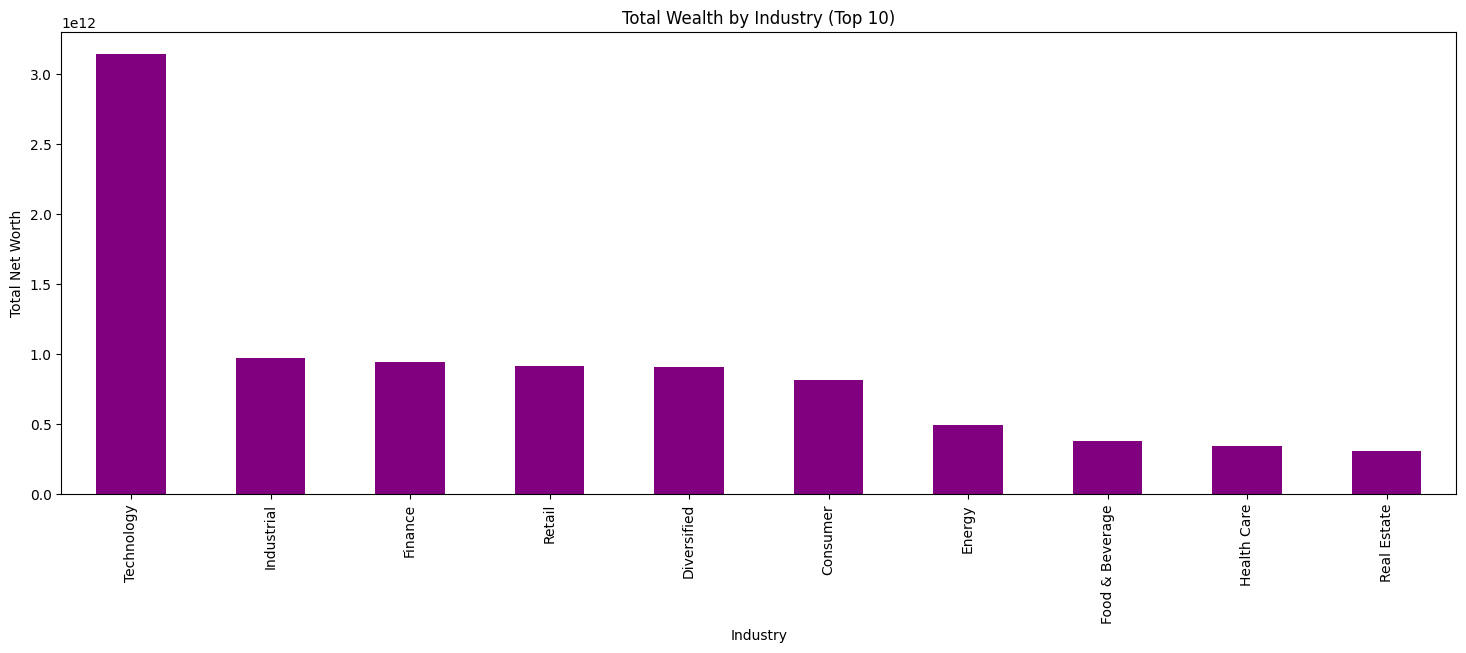

In [17]:
industry_wealth = df.groupby('Industry')['Total net worth '].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(18, 6))
industry_wealth.head(10).plot(kind='bar', color='purple')
plt.title('Total Wealth by Industry (Top 10)')
plt.xlabel('Industry')
plt.ylabel('Total Net Worth')
plt.show()

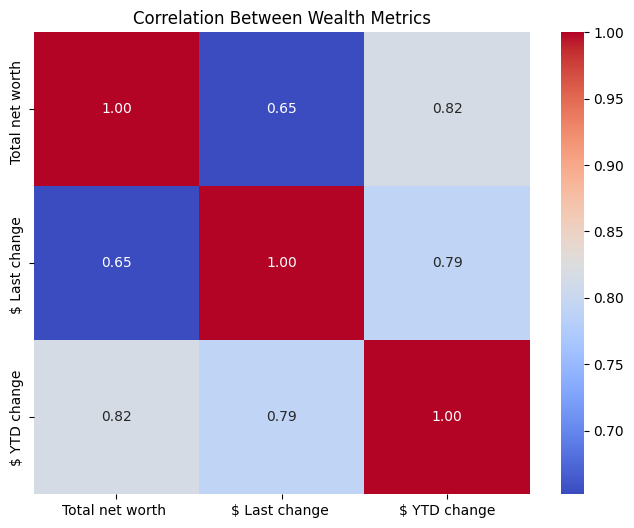

In [18]:
# Heatmap for correlation
correlation_matrix = df[['Total net worth ', '$ Last change ', '$ YTD change']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Wealth Metrics')
plt.show()

In [19]:
# Sort data by YTD change
top_10_gainers = df.nlargest(10, '$ YTD change')
top_10_losers = df.nsmallest(10, '$ YTD change')

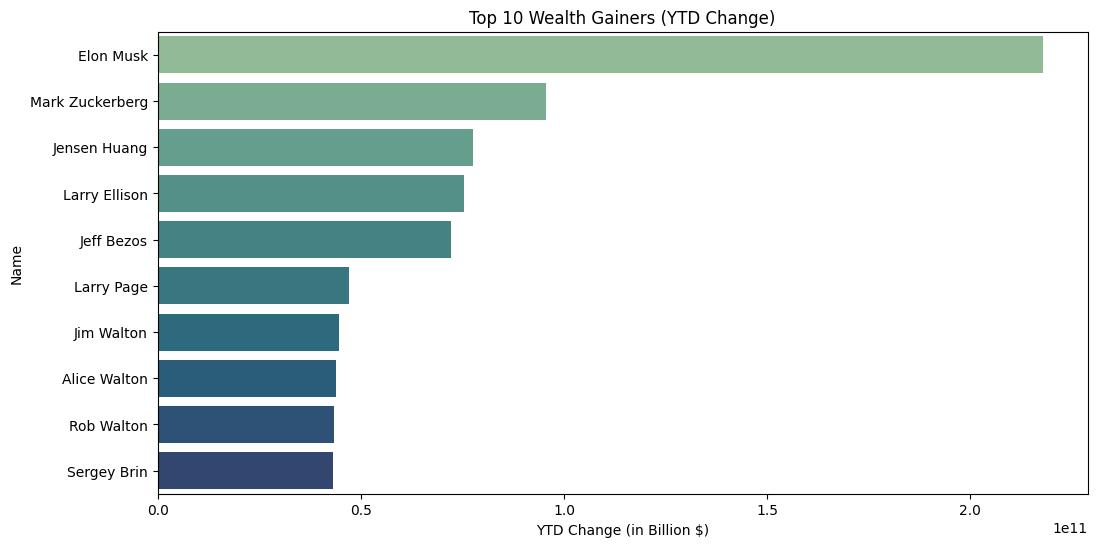

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_gainers, x='$ YTD change', y=' Name', palette='crest')
plt.title('Top 10 Wealth Gainers (YTD Change)')
plt.xlabel('YTD Change (in Billion $)')
plt.ylabel('Name')
plt.show()

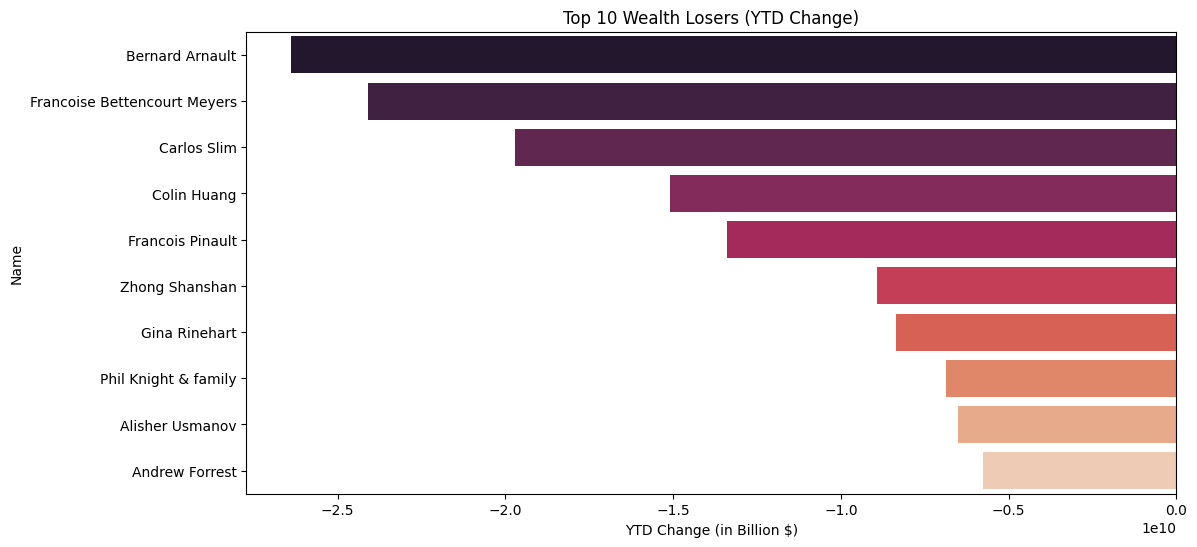

In [21]:
# Plot Top 10 Losers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_losers, x='$ YTD change', y=' Name', palette='rocket')
plt.title('Top 10 Wealth Losers (YTD Change)')
plt.xlabel('YTD Change (in Billion $)')
plt.ylabel('Name')
plt.show()

#  who is the next rich man in 2025 in world tell me.